# OOD image vs patch comparison

In [1]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns

if False: # only for JupyterLab with GPUs environment
    import sys
    sys.path.insert(0, '/notebooks/')
    sys.path.insert(0, '../')
    from CapsuleLib.utils import gpu_config, availableGPU
    gpuid = gpu_config(False, True)

## Paths setting

In [2]:
IMAGE_RESULTS_PATH = "/notebooks/Arnau/global-odin/results" # set paths here!
PATCH_RESULTS_PATH = "/notebooks/Arnau/patch-self-supervised/3fold/results"

## ROC comparison

In [3]:
image_roc = pd.read_csv(os.path.join(IMAGE_RESULTS_PATH, 'roc-e0.002.csv'))
roc_image_values = 1-image_roc.spec.values, image_roc.sens.values

patch_20_roc = pd.read_csv(os.path.join(PATCH_RESULTS_PATH, '20/roc-20-top5-t1000-eps0.001-f1.csv'))
roc_20_values = 1-patch_20_roc.spec.values, patch_20_roc.sens.values

patch_15_roc = pd.read_csv(os.path.join(PATCH_RESULTS_PATH, '15/roc-15-top5-t1000-eps0.0005-f1.csv'))
roc_15_values = 1-patch_15_roc.spec.values, patch_15_roc.sens.values

patch_10_roc = pd.read_csv(os.path.join(PATCH_RESULTS_PATH, '10/roc-10-top5-t1000-eps0.0005-f3.csv'))
roc_10_values = 1-patch_10_roc.spec.values, patch_10_roc.sens.values

(0.0, 1.0)

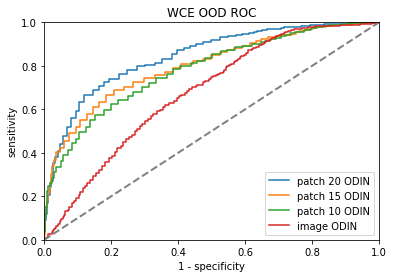

In [4]:
plt.step(*roc_20_values, where='post', label=f'patch 20 ODIN')
plt.step(*roc_15_values, where='post', label=f'patch 15 ODIN')
plt.step(*roc_10_values, where='post', label=f'patch 10 ODIN')
plt.step(*roc_image_values, where='post', label=f'image ODIN')
plt.xlabel("1 - specificity")
plt.ylabel("sensitivity")
plt.plot([0,1], [0,1], '--', color="gray", linewidth=2)
plt.legend()
plt.title("WCE OOD ROC")
plt.xlim([0, 1])
plt.ylim([0, 1])

In [5]:
for roc_values in [roc_20_values, roc_15_values, roc_10_values, roc_image_values]:
    revspec, sens = roc_values
    revspec, sens = np.array(revspec), np.array(sens)
    spec = 1-np.array(revspec)

    # metrics
    print("AUROC:",np.abs(np.trapz(spec, np.array(sens))))
    print("FPR80:",revspec[np.argmin(np.abs(sens-0.85))])
    print("FPR90:",revspec[np.argmin(np.abs(sens-0.90))])
    print("")

AUROC: 0.8371510225183822
FPR80: 0.39765624999999993
FPR90: 0.475

AUROC: 0.791351318359375
FPR80: 0.52421875
FPR90: 0.63203125

AUROC: 0.7744370404411764
FPR80: 0.52734375
FPR90: 0.64765625

AUROC: 0.6741364655671296
FPR80: 0.6015625
FPR90: 0.6557291666666667

